## IMMIGRATION TRENDS IN THE UNITED STATES

Ece Tanriverdi 

Link to my Github Webpage: https://github.com/ecetanriverdi


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Project Goals


The team, **Ece Tanriverdi**, will be investigating data sets related to immigration trends in the United States. The project will focus on examining various demographic variables such as country of origin, rates of voluntary versus forced immigration, and settlement patterns across U.S. states. At this stage, I am considering a few data sets that provide comprehensive insights into immigration to the U.S. over the past decade(2013-2023). These data sets will be crucial in understanding the shifts in immigration patterns, especially in light of major global events like COVID-19.

The data I am using from Homeland Security Statistics (OHSS)  is found here: https://ohss.dhs.gov/#:~:text=OHSS%20%7C%20Office%20of%20Homeland%20Security%20Statistics,-Previous&text=Our%20interactive%20map%20shows%20state,grants%2C%20and%20arrivals%20and%20adjustments.

The data I am using from the United States Census Bureau (USCB) is found here: https://data.census.gov/table/ACSDP1Y2023.DP02?q=immigrant%20database



The data will be sourced from Office of Homeland Security Statistics (OHSS) and United States Census Bureau (USCB), which offer detailed statistics on immigrant demographics and geographic trends. With this data, I aim to explore several key questions, including:

- Which countries send the most immigrants to the U.S.?  
- What are the rates of forced versus voluntary immigration?  
- Which U.S. states attract the largest immigrant populations?  
- Are there noticeable trends in immigration patterns, particularly post-COVID-19?

Initial Steps
My initial approach will be to extract, transform, and load (ETL) the data from OHSS and USCB to ensure it is clean and tidy for analysis. For now, I will focus on identifying three to five key statistics that reveal interesting trends in immigration, such as:

- The top five countries of origin for U.S. immigrants in the last decade.
- The most common states for immigrant settlement are ranked by population size.
- Any significant changes in the rates of immigration post-COVID-19.

A preliminary graph will be generated to visualize the distribution of immigrants by country of origin, which will provide insight into global migration patterns.

## Collaboration Plan

Since I am working on this project independently, I will maintain a consistent schedule to meet the project goals. I plan to set up weekly work sessions and will upload all relevant code and data analysis to a private GitHub repository. I will also use Jupyter Notebooks to document the ETL process and track progress. Any challenges or difficulties in formatting and tidying the data will be documented for review.

## Table 1: Asylees 

I start by reading the cvs into data frame and deleting the rows I do not need which area the ones before 2013.

In [156]:
asylees1 = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/Asylees table 16.csv")
asylees1 = asylees1.drop(asylees1.index[:23]) 
asylees1 = asylees1.set_index('Year')
asylees1.head(11)



,Total,Affirmative,Defensive
Year,,,
2013,"24,630","14,890","9,750"
2014,"23,040","14,420","8,610"
2015,"25,940","17,800","8,140"
2016,"20,310","11,610","8,700"
2017,"26,370","15,800","10,570"
2018,"37,690","24,490","13,200"
2019,"45,800","26,880","18,920"
2020,"30,710","16,100","14,610"
2021,"16,550","9,130","7,420"


The graph shows the trends in total, affirmative, and defensive asylee cases from 2013 to 2023.
-  Overall Trends: The total number of cases fluctuates, with notable increases in 2018-2019 and a sharp rise in 2023.
- COVID-19 Impact: A decline in cases occurred in 2020-2021, likely due to travel restrictions and immigration policy changes during the pandemic.
- Affirmative vs. Defensive Cases: Defensive cases increased steadily, reflecting stricter immigration enforcement and more asylum claims during deportation proceedings.

These trends highlight how global events and U.S. immigration policies shape asylum applications, providing insights for policymakers and organizations working with immigrants.


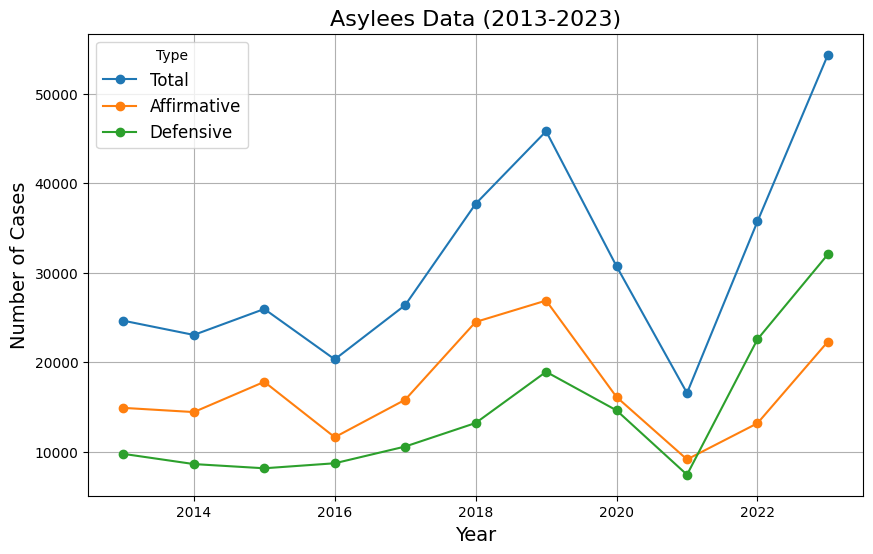

In [157]:
asylees1 = asylees1.replace(',', '', regex=True).astype(int)

asylees1.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Asylees Data (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True)
plt.legend(title='Type', fontsize=12)

plt.show()

## Table 2: Regions and Countries

For this table, I wanted to break it down into two parts: region and country of nationality. This distinction allows for a more structured analysis of asylee trends, providing a broader picture of migration patterns through regional data while also highlighting specific countries that contribute to asylum applications. Focusing on regions helps identify larger geopolitical or economic factors influencing asylum trends, such as conflicts in Africa or Asia, while the country-level breakdown reveals which nations are most affected by crises, showcasing countries like Afghanistan or Venezuela with significant numbers of asylum seekers. This dual approach ensures a comprehensive view of migration trends over time.

In [158]:
asylees2 = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/Asylees table 17.csv")
regions_data = asylees2.iloc[:8] 
regions_data = regions_data.set_index('REGION')  
regions_data



,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
REGION,,,,,,,,,,
Total,"14,420","17,800","11,610","15,800","24,490","26,880","16,100","9,130","13,170","22,300"
Africa,"4,220","3,800","2,140","2,910","4,500","5,200","3,300","1,980","2,580","1,520"
Asia,"7,410","6,570","4,360","5,710","7,870","9,230","6,330","3,270","5,320","18,270"
Europe,560,730,470,660,"1,560","1,880","1,080",600,830,540
North America,"1,590","5,750","4,100","5,800","4,280","3,820","1,790","1,560","1,610",860
Oceania,20,0,10,10,0,0,0,0,0,0
South America,590,900,510,670,"6,210","6,660","3,540","1,680","2,750","1,050"
Unknown,40,50,30,40,70,100,60,50,80,60


I aimed to obtain the average number of asylees for each region to provide a clearer understanding of the trends in asylum-seeking behavior across different geographical areas.

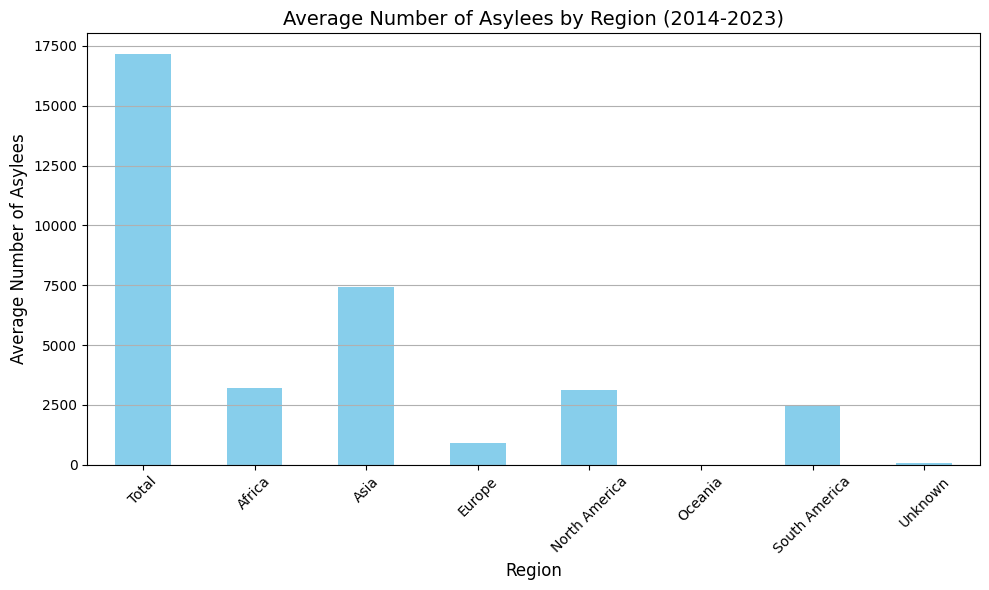

In [159]:
regions_data = regions_data.replace(',', '', regex=True)  
regions_data = regions_data.apply(pd.to_numeric, errors='coerce')  
averages = regions_data.mean(axis=1)

plt.figure(figsize=(10, 6))
averages.plot(kind='bar', color='skyblue')
plt.title('Average Number of Asylees by Region (2014-2023)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Number of Asylees', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()




In [160]:

countries_data = asylees2.iloc[9:]  

countries_data = countries_data.reset_index(drop=True)  
countries_data = countries_data.set_index('REGION')
countries_data.index.name = 'COUNTRY'

countries_data

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
COUNTRY,,,,,,,,,,
Total,"14,420","17,800","11,610","15,800","24,490","26,880","16,100","9,130","13,170","22,300"
Afghanistan,100,160,80,90,80,80,40,100,"1,180","14,330"
Albania,30,30,10,20,50,50,10,20,20,10
Algeria,10,10,0,10,20,30,10,20,0,0
Angola,10,30,10,20,40,30,20,10,10,20
...,...,...,...,...,...,...,...,...,...,...
Vietnam,10,10,10,20,30,40,20,10,10,10
Yemen,30,60,40,50,60,120,50,20,20,40
Zimbabwe,20,30,10,30,70,70,50,30,50,20


I focused on identifying the top 5 countries by the average number of asylees to gain insights into which nations contribute the most to asylum claims. By calculating the average number of asylees for each country, I was able to highlight significant trends and patterns in the data. This approach allowed me to exclude aggregate figures, such as totals, ensuring our analysis was precise and focused on individual contributions. Presenting the results through a graph further enhances my understanding by visually representing the disparities among countries, making it easier to comprehend the scale of asylum-seeking behavior from different regions.

<Axes: title={'center': 'Top 5 Countries by Average Number of Asylees'}, xlabel='COUNTRY'>

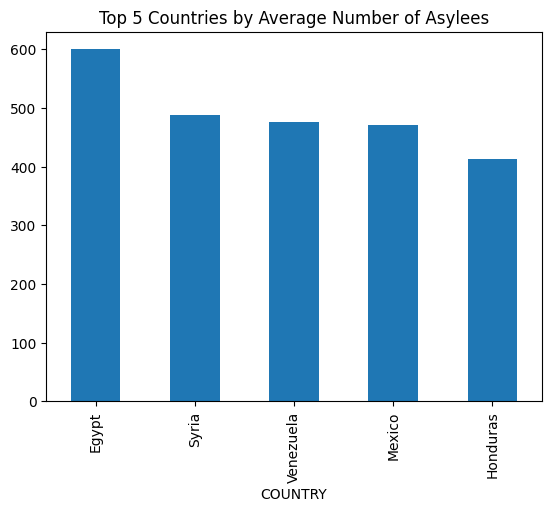

In [161]:

countries_data = countries_data.apply(pd.to_numeric, errors='coerce')
average_countries = countries_data.mean(axis=1).dropna()
top_countries = average_countries.nlargest(5)
top_countries.plot(kind='bar', title='Top 5 Countries by Average Number of Asylees')
